In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import pickle


# Librerias de preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss


# Librerias de tensorflow y keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Data validation y analisis

Usaremos un dataset previamente limpiado y explorado

In [2]:
df = pd.read_csv('credit_score_cleaned.csv')

In [3]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [5]:
df.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance,credit_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.309240,50505.123439,4198.771620,107.043617,5.368800,5.533640,14.53208,3.532880,21.068780,13.334050,10.389303,5.772820,1426.220376,32.285173,221.206880,637.633413,403.120320,0.88830
std,10.764996,38299.422075,3187.494355,130.035096,2.593279,2.067073,8.74133,2.446356,14.860104,6.271409,6.789784,3.861137,1155.129026,5.116875,99.681112,2043.334171,214.014558,0.67512
min,14.000000,7005.930000,303.645420,0.000000,0.000000,0.000000,1.00000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760,0.00000
25%,24.000000,19342.972500,1626.761700,29.197023,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,144.000000,74.593977,270.189028,0.00000
50%,33.000000,36999.705000,3096.378400,66.403020,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305783,219.000000,135.952230,337.114475,1.00000
75%,42.000000,71683.470000,5961.745000,146.827450,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.860000,8.000000,1945.962500,36.496664,302.000000,266.178185,471.570645,1.00000
max,56.000000,179987.280000,15204.634000,3776.000000,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,10000.000000,1602.040500,2.00000


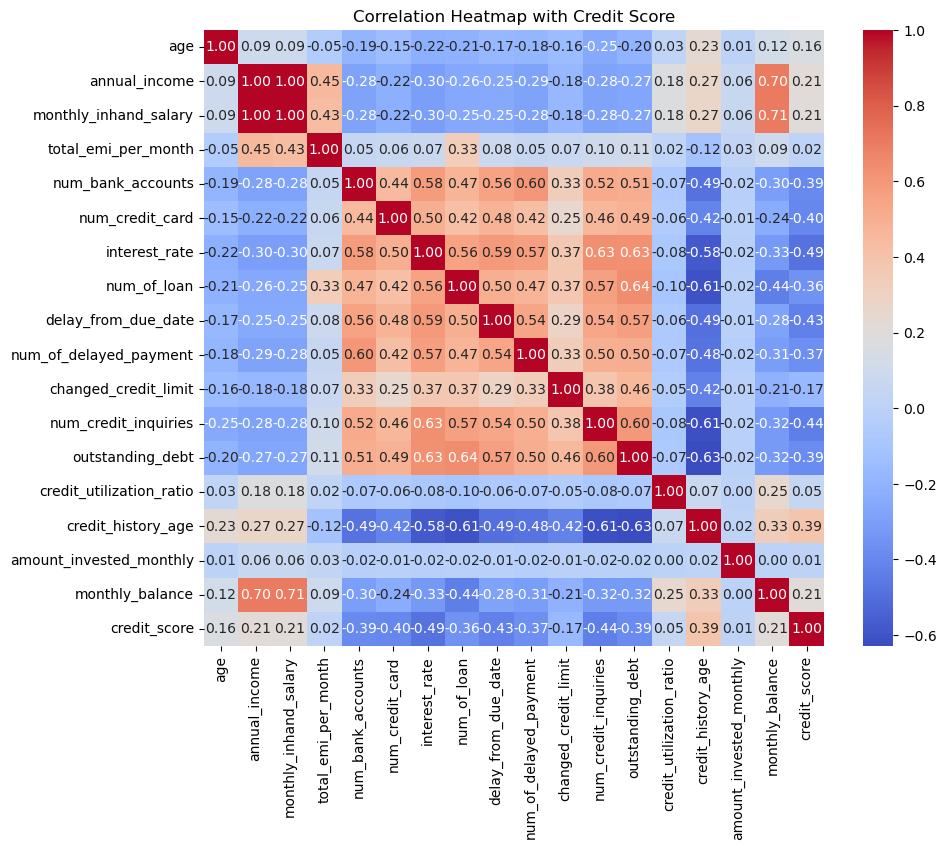

In [6]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [7]:
# Seleccionar columnas numericas
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

C:\Users\Windows\AppData\Local\Temp\ipykernel_3368\3807351282.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
C:\Users\Windows\AppData\Local\Temp\ipykernel_3368\3807351282.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
C:\Users\Windows\AppData\Local\Temp\ipykernel_3368\3807351282.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
C:\Users\Windows\AppData\Local\Temp\ipykernel_3368\3

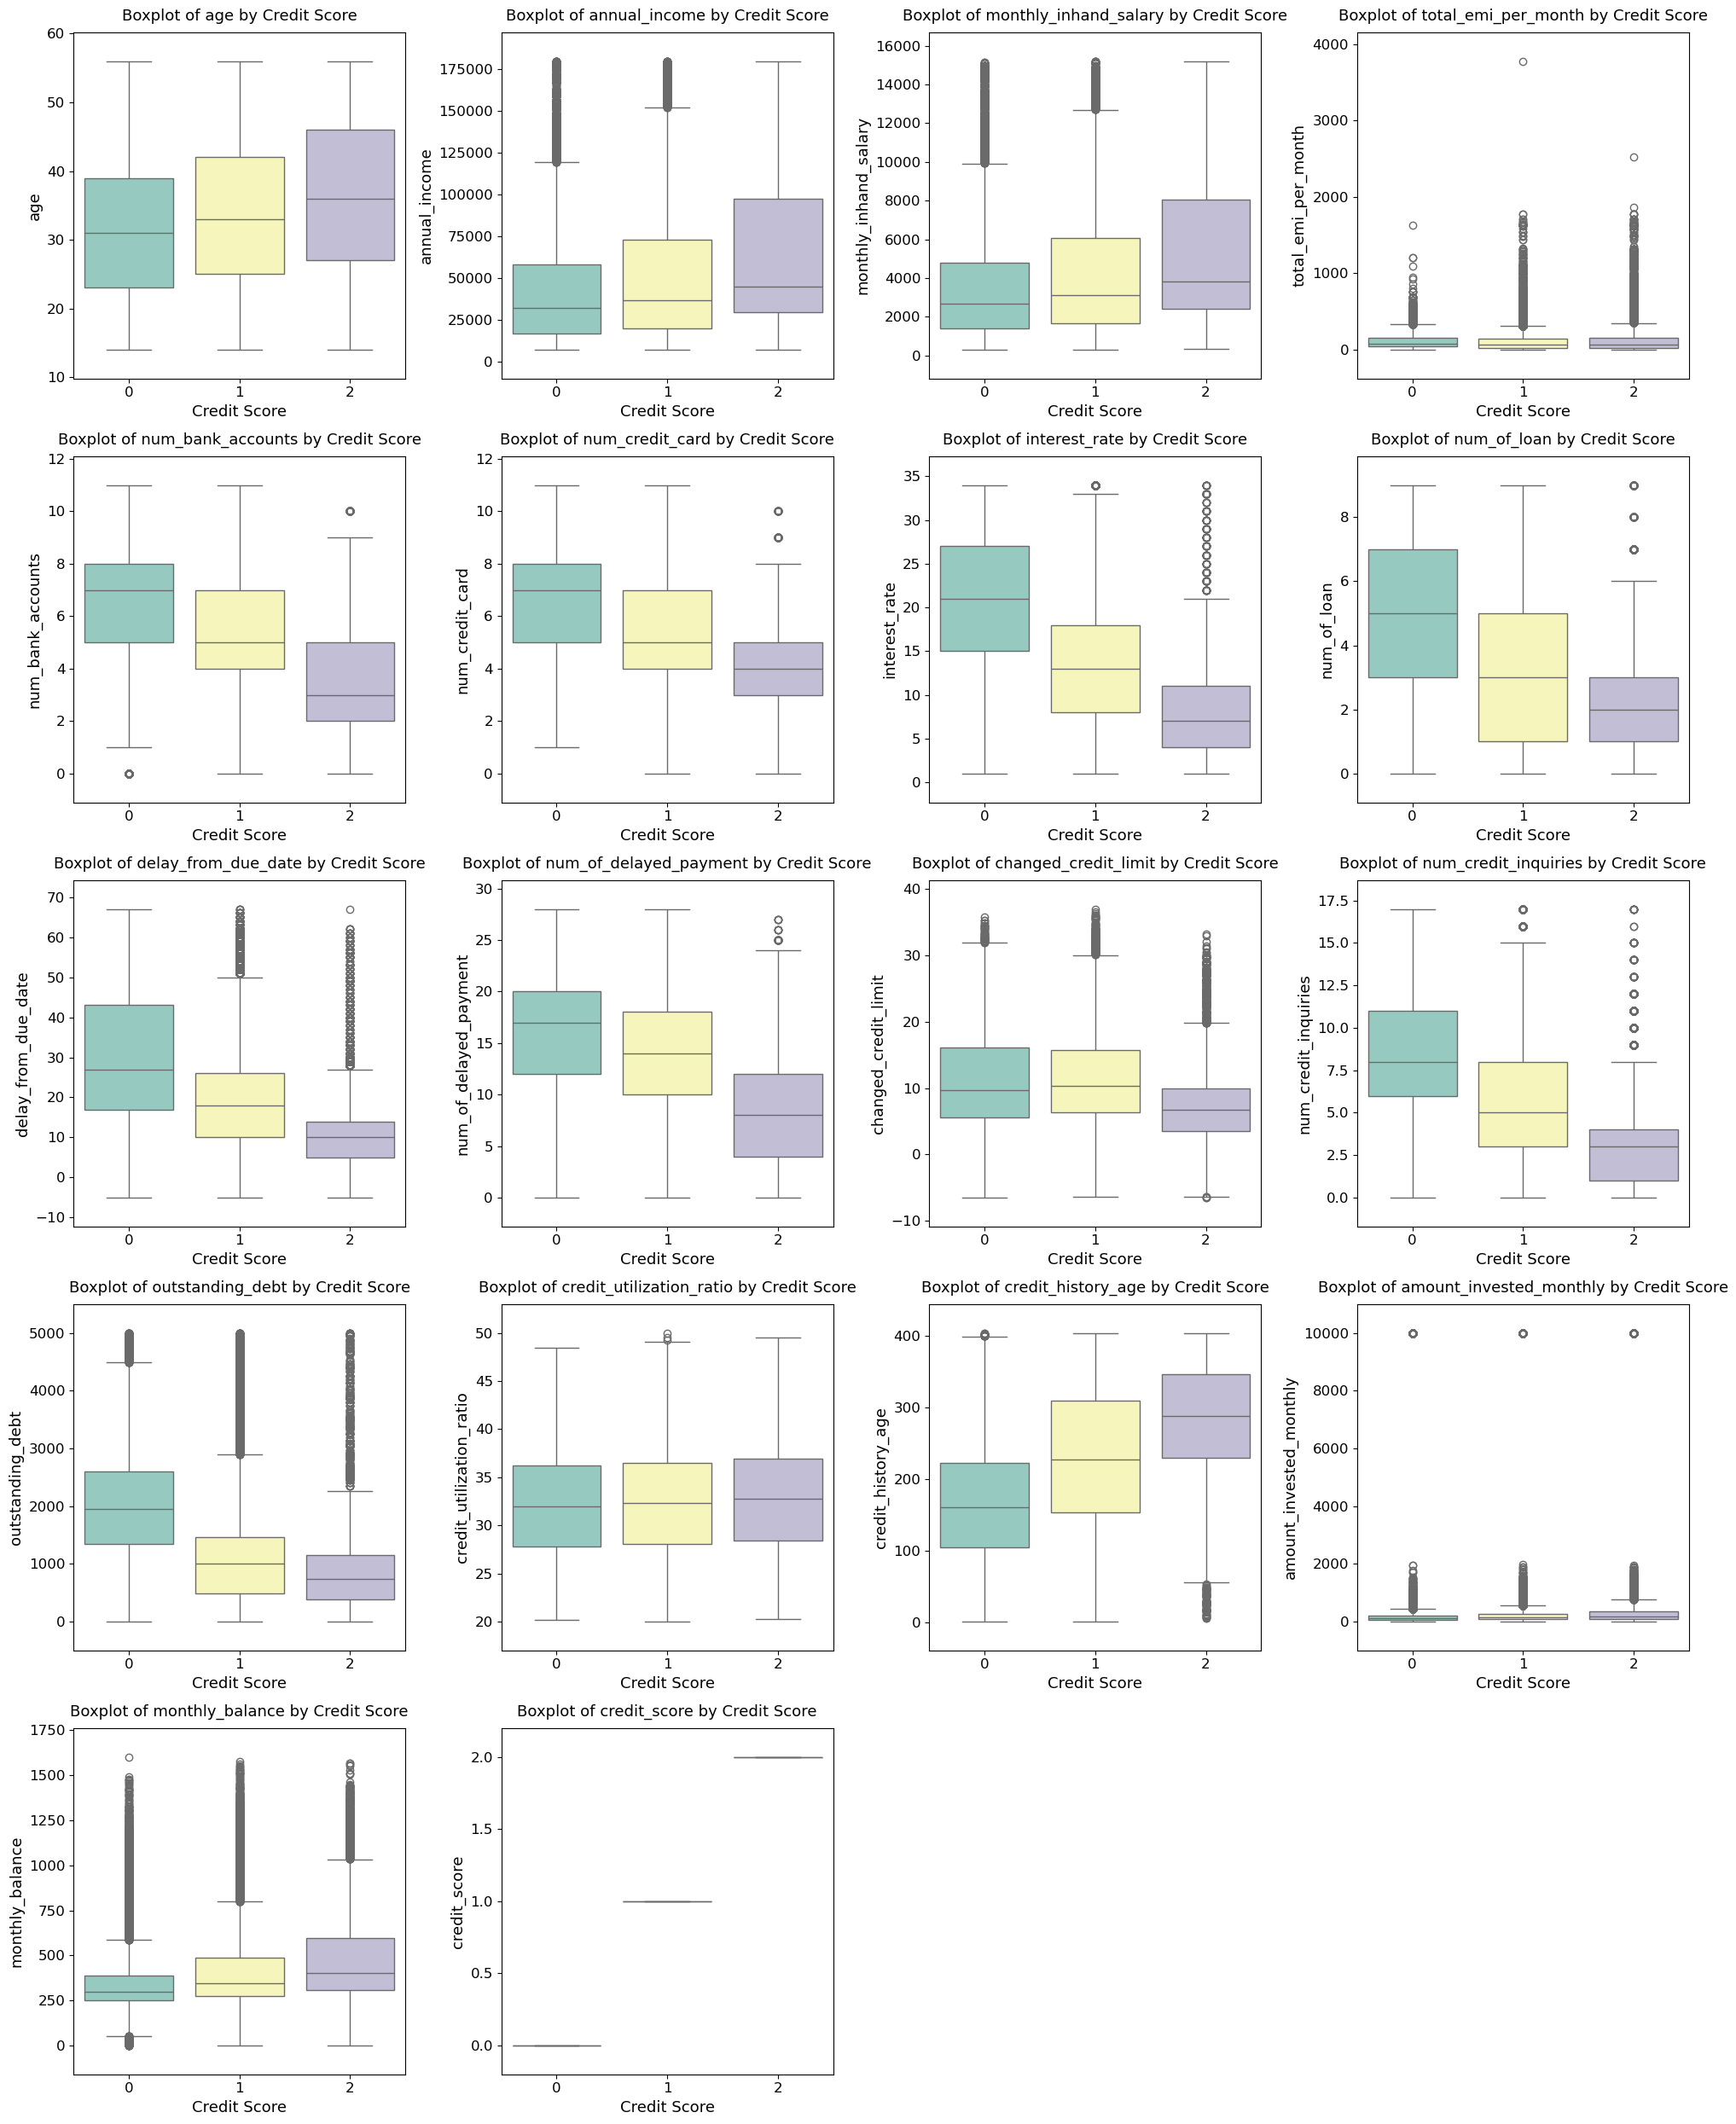

In [8]:

# Calcular numero de filas y columnas
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

# Plotting
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()
plt.show()

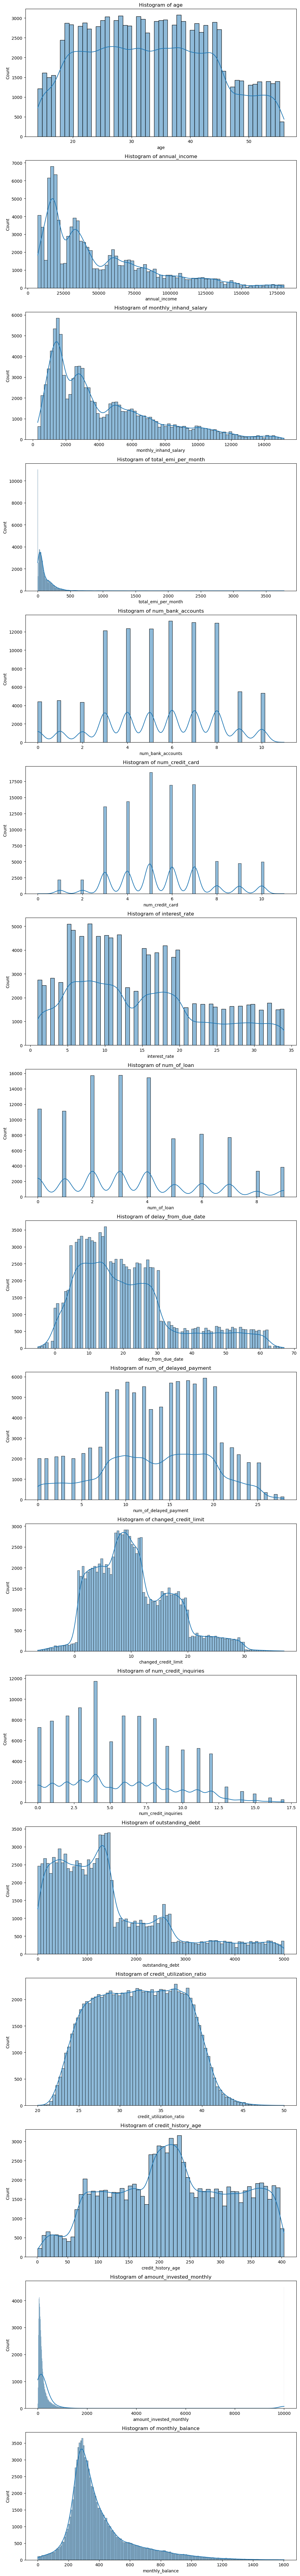

In [9]:
# Seleccionar columnas numericas
features = numeric_columns[:-1]

n_cols = 1
n_rows = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
plt.subplots_adjust(hspace=0.5)

# Plotting
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [10]:
# Funcion para detectar outliers
def detect_outliers_iqr(df):
    outliers = {}

    # Seleccionar columnas numericas
    numeric_df = df.select_dtypes(include=['number'])

    for column in numeric_df.columns:
        # Calcular primer y tercer cuartil
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)

        # Calcular rango intercuartil
        IQR = Q3 - Q1

        # Calcular limite inferior y superior
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identificar outliers
        outlier_mask = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
        outliers[column] = numeric_df[column][outlier_mask]

    return outliers

outlier_results = detect_outliers_iqr(df)

for column, outlier_values in outlier_results.items():
    if not outlier_values.empty:
        print(f"{column} outliers:")
        print(outlier_values)
    else:
        print(f"For {column} no outliers.")


For age no outliers.
For annual_income no outliers.
For monthly_inhand_salary no outliers.
total_emi_per_month outliers:
50       911.22015
51       911.22015
52       911.22015
53       911.22015
54       911.22015
           ...    
99627    999.71930
99628    999.71930
99629    999.71930
99630    999.71930
99631    999.71930
Name: total_emi_per_month, Length: 1338, dtype: float64
For num_bank_accounts no outliers.
For num_credit_card no outliers.
For interest_rate no outliers.
For num_of_loan no outliers.
For delay_from_due_date no outliers.
For num_of_delayed_payment no outliers.
For changed_credit_limit no outliers.
For num_credit_inquiries no outliers.
For outstanding_debt no outliers.
For credit_utilization_ratio no outliers.
For credit_history_age no outliers.
amount_invested_monthly outliers:
18       10000.0000
23       10000.0000
28       10000.0000
54         930.3919
55         870.5224
            ...    
99919    10000.0000
99927     1104.4163
99951    10000.0000
99973  

In [11]:
df["credit_score"].value_counts(normalize = True) # 2:Good, 1: Standard, 0: Poor

credit_score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

# Data Preprocessing


In [12]:
# Lista de categorias de prestamos
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                    'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

# Agregar columnas para cada categoria de prestamo
for loan_type in unique_loan_types:
    # Reemplazar espacios y '-' con '_' y convertir a minusculas
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))


In [13]:
df = df.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
1,February,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
2,March,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
3,April,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
4,May,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0


In [14]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,# Demostrar responsabilidad en deudas grandes es lo que mas contribuye al credit score
    'High_spent_Medium_value_payments': 5, # Pagos medios con alto gasto impacta positivamente en credit score.
    'High_spent_Small_value_payments': 4, # Los pagos bajos pueden afectar negativamente al credit score si se acumula la deuda.
    'Low_spent_Large_value_payments': 3, # Demuestra responsabilidad, impacta positivamente en credit score.
    'Low_spent_Medium_value_payments': 2, # Impacta positivamente en credit score.
    'Low_spent_Small_value_payments': 1 # Contribuye minimamente al credit score.
}


df['payment_behaviour'] = df['payment_behaviour'].map(payment_mapping)

df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'], downcast='integer')


In [15]:
# Convertir credit_mix a numerica
df['credit_mix'] = df['credit_mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

df['credit_mix'] = pd.to_numeric(df['credit_mix'], downcast='integer')

In [16]:
# Convertir payment_of_min_amount a numerica
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes': 1, 'No': 0})

df['payment_of_min_amount'] = pd.to_numeric(df['payment_of_min_amount'], downcast='integer')



In [17]:
df = pd.get_dummies(df, columns=['occupation'])

In [18]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

#Mapping
df['month'] = df['month'].map(month_map)

df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [19]:
# Separar features y target
X = df.drop("credit_score", axis=1)
y = df.credit_score

In [20]:
y.value_counts(normalize=True) # Data desbalanceada  2:Good, 1: Standard, 0: Poor

credit_score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

In [21]:
# Usaremos un SMOTE resampling para balancear la data
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [22]:
y.value_counts() # 2:Good, 1: Standard, 0: Poor

credit_score
2    53174
1    53174
0    53174
Name: count, dtype: int64

In [23]:
df.head()

,month,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,1,23,19114.12,1824.8434,49.574947,3,4,3,4,3,...,False,False,False,False,False,False,False,True,False,False
1,2,23,19114.12,1824.8434,49.574947,3,4,3,4,-1,...,False,False,False,False,False,False,False,True,False,False
2,3,23,19114.12,1824.8434,49.574947,3,4,3,4,3,...,False,False,False,False,False,False,False,True,False,False
3,4,23,19114.12,1824.8434,49.574947,3,4,3,4,5,...,False,False,False,False,False,False,False,True,False,False
4,5,23,19114.12,1824.8434,49.574947,3,4,3,4,6,...,False,False,False,False,False,False,False,True,False,False


## Train-Test Splits

In [24]:
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    stratify=y, random_state=42)

In [25]:
df["credit_score"].value_counts()

credit_score
1    53174
0    28998
2    17828
Name: count, dtype: int64

In [26]:
y_train.value_counts()

credit_score
0    47857
2    47856
1    47856
Name: count, dtype: int64

In [27]:
# Columnas a aplicar RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']

# Columnas a aplicar StandardScaler (Todas menos a las que se le aplico RobustScaler)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Crear ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

# Aplicar a train data, ajustando y transformando
X_train_scaled= scaler.fit_transform(X_train)

# Aplicar a test data, solo transformando
X_test_scaled = scaler.transform(X_test)


In [28]:
# Definir funcion para evaluar metricas del modelo
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# ANN Model

In [29]:
# Creamos ANN
tf.random.set_seed(23)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model.compile(optimizer = Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                                patience=70,
                                restore_best_weights=True)

model.fit(x=X_train_scaled,
            y=y_train,
            validation_data=(X_test_scaled, y_test),
            batch_size=512,
            epochs=750,
            verbose=1,
            callbacks=[early_stopping])

c:\Users\Windows\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6203 - loss: 0.9337 - val_accuracy: 0.7274 - val_loss: 0.6677
Epoch 2/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7201 - loss: 0.6833 - val_accuracy: 0.7454 - val_loss: 0.6099
Epoch 3/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7394 - loss: 0.6290 - val_accuracy: 0.7558 - val_loss: 0.5789
Epoch 4/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7476 - loss: 0.6040 - val_accuracy: 0.7622 - val_loss: 0.5609
Epoch 5/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7533 - loss: 0.5870 - val_accuracy: 0.7680 - val_loss: 0.5464
Epoch 6/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7596 - loss: 0.5720 - val_accuracy: 0.7734 - val_loss: 0.5333
Epoch 7/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7643 - loss: 0.5593 - val_accuracy: 0.7825 - val_loss: 0.5175
Epoch 8/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7703 - loss: 0.5460 -

El mejor resultado se obtuvo en la epoch 408, por lo que entrenaremos el modelo final en 408 sin early stopping rounds

<Axes: >

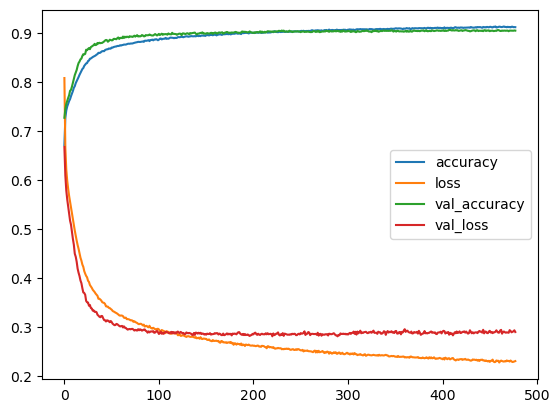

In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [31]:
model.evaluate(X_train_scaled, y_train)

4487/4487 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9491 - loss: 0.1346


[0.13169287145137787, 0.9506439566612244]

In [32]:
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

4487/4487 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[5066  198   53]
 [ 649 4240  429]
 [  22  135 5161]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5317
           1       0.93      0.80      0.86      5318
           2       0.91      0.97      0.94      5318

    accuracy                           0.91     15953
   macro avg       0.91      0.91      0.91     15953
weighted avg       0.91      0.91      0.91     15953


Train Set:
[[47524   319    14]
 [ 4051 41292  2513]
 [    3   186 47667]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     47857
           1       0.99      0.86      0.92     47856
           2       0.95      1.00      0.97     47856

    accuracy                           0.95    143569
   macro avg       0.95      0.95      0.95    143569
weighted avg       0.95      0.95      0.95    143569



In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,036,171 (3.95 MB)

 Trainable params: 344,451 (1.31 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 688,904 (2.63 MB)

# Final Model

In [34]:
# Entrenaremos el modelo final con todos los datos
print(X.shape)
print(y.shape)

(159522, 46)
(159522,)


In [35]:
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']
standard_columns = [col for col in X_train.columns if col not in robust_columns]

scaler= ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)
    ]
)

scaler = scaler.fit(X)

In [38]:
pickle.dump(scaler, open("credit_score_scaler", 'wb'))

In [39]:
X_scaled = scaler.transform(X)

In [41]:
tf.random.set_seed(23)

final_model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
final_model.compile(optimizer = Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

final_model.fit(x=X_scaled,
            y=y,
            batch_size=512,
            epochs=408,
            verbose=1)

Epoch 1/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6204 - loss: 0.9258
Epoch 2/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7283 - loss: 0.6623
Epoch 3/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7440 - loss: 0.6175
Epoch 4/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7537 - loss: 0.5942
Epoch 5/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7592 - loss: 0.5755
Epoch 6/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7644 - loss: 0.5634
Epoch 7/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7708 - loss: 0.5491
Epoch 8/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7771 - loss: 0.5357
Epoch 9/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7820 - loss: 0.5248
Epoch 10/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7884 - loss: 0.5104
Epoch 11/408
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7924 - loss: 0.5008
Epoch 12/408
312/312 ━━━━━━━━

In [42]:
# Guardar modelo

save_model(final_model, 'final_model_credit_score.keras')